In [162]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

In [163]:
class Net(nn.Module):
  def __init__(self, input):
    super(Net, self).__init__()
    self.hiddenOne = nn.Linear(input, 50)
    self.hiddenTwo = nn.Linear(50, 50)
    self.output = nn.Linear(50, 3)

  def forward(self, x):
    z1 = self.hiddenOne(x)
    z2 = F.relu(z1)
    z3 = self.hiddenTwo(z2)
    z4 = F.relu(z3)
    z5 = self.output(z4)
    return z5

In [164]:
device = torch.device("cpu")

train_x = torch.Tensor(X_train).float().to(device)
test_x = torch.Tensor(X_test).float().to(device)
train_y = torch.Tensor(y_train).long().to(device)
test_y = torch.Tensor(y_test).long().to(device)

In [165]:
net = Net(train_x.shape[1]).to(device)

no_epochs = 100
learning_rate = 1
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate)

print("\nStarting training ")


Starting training 


In [166]:
train_losses = []
for epoch in range(0, no_epochs):

    optimizer.zero_grad()
    predictions = net(train_x)

    loss = loss_func(predictions, train_y)
    loss.backward()
    optimizer.step()

    train_losses.append(loss.item())

    if epoch % 10 == 0:
        print(f"Loss in epoch {epoch} is {loss.item()}")

print("Done training ")

Loss in epoch 0 is 1.0928711891174316
Loss in epoch 10 is 0.39930465817451477
Loss in epoch 20 is 0.11730947345495224
Loss in epoch 30 is 0.06571207195520401
Loss in epoch 40 is 0.053794365376234055
Loss in epoch 50 is 0.35783258080482483
Loss in epoch 60 is 0.049506835639476776
Loss in epoch 70 is 0.0441630594432354
Loss in epoch 80 is 0.041213683784008026
Loss in epoch 90 is 0.042324911803007126
Done training 


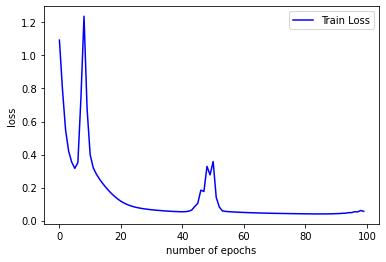

Accuarcy is 96.66666666666667%


In [167]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(0, no_epochs), train_losses, color='blue')
plt.legend(['Train Loss'], loc='upper right')
plt.xlabel('number of epochs')
plt.ylabel('loss')
plt.show()

predictions = net(test_x)
_, predicted = torch.max(predictions.data, 1)
correct = (predicted == test_y).sum().item()
print(f"Accuarcy is {100. * correct / len(test_x)}%")

In [168]:
#X_test[0]
#Y_test[0]
from Pyfhel import Pyfhel

pyfhel = Pyfhel()
pyfhel.contextGen(p=65537)

pyfhel.keyGen()

array([-1.50652052,  0.78880759, -1.34022653, -1.18381211])